# Predicting the Sale Price of Bulldozers (Regression Problem)


## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its various characteristics/features and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more information about the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning Regression model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset

Data dictionary can be seen here on Google Sheets : https://docs.google.com/spreadsheets/d/1hfDQfDOFsLhIBpne0-O1Li8ZAqNt9OuLaNUSQ3HzdR0/edit?usp=sharing

## 5. Modelling and Experimentation
  
Find a model that suits your problem, fit it using training set and test its efficiency on a validation set.

Since we will need to do a lot of experimentation for obtaining good hyperparameters, it is a good idea to use partial data for training and validation rather than the whole, so that the time between experiments can be shortened.


## 6. Analyse Feature Importances

Analysing Feature importance is necessary to improve models furthur. This provides valuable insights on how the model learns and helps in future data collection in the sense that most important features can be given priority for collection.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [94]:
# Load the prepared data
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp_no_missing_all_numerical.csv")
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,3.0,1974,68.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,3.0,1980,4640.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,3.0,1978,2838.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,3.0,1980,3486.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,3.0,1984,722.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [95]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [96]:
df_tmp.shape

(412698, 103)


# Modelling

In [71]:
%%time
#initial fit on all data (takes too much time)


# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

Wall time: 4min 43s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [72]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

0.9873039604105666

In [19]:
%%time
#initial fit on all data without n_jobs =-1 (takes even more time)


# Instantiate model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

Wall time: 12min 38s


RandomForestRegressor(random_state=42)

In [20]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp.SalePrice)

0.9873039604105666

### This metrics is not reliable since training and scoring done on same data

### Splitting data into train/valid sets

In [97]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,3.0,1974,68.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,3.0,1980,4640.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,3.0,1978,2838.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,3.0,1980,3486.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,3.0,1984,722.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


### Divide data into train and validation set

According to the [Kaggle data page](https://www.kaggle.com/c/bluebook-for-bulldozers/data), the validation set and test set are split according to dates.

Since this is a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like `train_test_split()` wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:
* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

For more on making good training, validation and test sets, check out the post [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas.

In [98]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [99]:
df_val = df_tmp[df_tmp["saleYear"]==2012]
df_train = df_tmp[df_tmp["saleYear"]!=2012]
len(df_val), len(df_train)

(11573, 401125)

In [100]:
X_train, y_train = df_train.drop('SalePrice', axis = 1),df_train['SalePrice']
X_val, y_val = df_val.drop('SalePrice', axis =1),df_val['SalePrice']
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [101]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,3.0,1974,68.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,3.0,1980,4640.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,3.0,1978,2838.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,3.0,1980,3486.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,3.0,1984,722.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [102]:
y_train.head()

0     9500.0
1    14000.0
2    50000.0
3    16000.0
4    22000.0
Name: SalePrice, dtype: float64

### Building an evaluation function

According to Kaggle for the Bluebook for Bulldozers competition, [the evaluation function](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation) they use is root mean squared log error (RMSLE).

**RMSLE** = generally you don't care as much if you're off by $10 as much as you'd care if you were off by 10%, you care more about ratios rather than differences. **MAE** (mean absolute error) is more about exact differences.

Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's [mean_squared_log_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error) (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2.

In [103]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Returns root mean square log error.
    
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def eval_scores (model, X_train, X_val,y_train,y_val):
    """
    Returns mean absolute error, mean square log error, root mean square log error, R^2 score on train and validation data.
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    score = {'Train MAE': mean_absolute_error(y_train,train_preds),
             'Val MAE': mean_absolute_error(y_val,val_preds),
            'Train MSLE':mean_squared_log_error(y_train, train_preds),
            'Val MSLE':mean_squared_log_error(y_val, val_preds),
            'Train RMSLE':rmsle(y_train, train_preds),
            'Val RMSLE':rmsle(y_val, val_preds),
            'Train R2':r2_score(y_train,train_preds),
            'Val R2':r2_score(y_val,val_preds)}
    return score

### Testing our model on a subset (to tune the hyperparameters)

Retraing an entire model would take far too long to continuing experimenting as fast as we want to.

So, take a sample of the training set and tune the hyperparameters on that before training a larger model.

If experiments are taking longer than 10-seconds, you should be trying to speed things up. You can speed things up by sampling less data or using a faster computer.

* Methods to restrict data given for training:  
1) Using slicing `model.fit(X_train[:10000],y_train[:10000])`  
2) Using Random Forest Regressors parameter `max_samples` : alter the number of samples each `n_estimator` in the [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) see's using the `max_samples` parameter.

In [13]:
model = RandomForestRegressor(n_jobs=-1, max_samples=10000)

Setting `max_samples` to 10000 means every `n_estimator` (default 100) in our `RandomForestRegressor` will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (the model has less samples to learn patterns from).

In [14]:
%%time
model.fit(X_train,y_train)

Wall time: 10.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [15]:
eval_scores(model, X_train,X_val,y_train,y_val)

{'Train MAE': 5590.887493649113,
 'Val MAE': 7315.165969930009,
 'Train MSLE': 0.06698609879427689,
 'Val MSLE': 0.09041427082917872,
 'Train RMSLE': 0.25881672819637624,
 'Val RMSLE': 0.3006896586668366,
 'Train R2': 0.8595185563794857,
 'Val R2': 0.830435601594026}

In [15]:
# without n_jobs=-1 (takes more time)
model = RandomForestRegressor(max_samples=10000)

In [16]:
%%time
model.fit(X_train,y_train)

Wall time: 30.7 s


RandomForestRegressor(max_samples=10000)

In [17]:
eval_scores(model, X_train,X_val,y_train,y_val)

{'Train MAE': 5582.799074478031,
 'Val MAE': 7316.077692041821,
 'Train MSLE': 0.06676493053398679,
 'Val MSLE': 0.08968567793517115,
 'Train RMSLE': 0.25838910684080085,
 'Val RMSLE': 0.2994756716916604,
 'Train R2': 0.8596446753249801,
 'Val R2': 0.8280473392386034}

## Hyperparameter Tuning with Randomized Search CV

In [104]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid_1 = {"n_estimators": np.arange(10, 400, 20),
           "max_depth": [None, 3, 5, 10,20,40],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(3, 20, 2),
           "max_features": [0.5, 1.0, "sqrt", "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_2 = {"n_estimators": np.arange(10, 200, 20),
           "max_depth": [None, 3, 5, 10,20,40],
           "min_samples_split": np.arange(4, 20, 2),
           "min_samples_leaf": np.arange(5, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_3 = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_4 = {"n_estimators": np.arange(50, 600, 30),
           "max_depth": [None,5, 10,20, 40, 60],
           "min_samples_split": np.arange(2, 16, 2),
           "min_samples_leaf": np.arange(1, 16, 2),
           "max_features": [0.5,1.0,0.75, "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_5 = {"n_estimators": np.arange(10, 1000, 70),
           "max_depth": [None, 10,20,40,60,80],
           "min_samples_split": np.arange(4, 20, 2),
           "min_samples_leaf": np.arange(5, 20, 2),
           "max_features": [0.5, 1, 0.75, "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_4_re = {"n_estimators": np.arange(200, 1000, 50),
           "max_depth": [None,10,20, 40, 60,80],
           "min_samples_split": np.arange(2, 16, 2),
           "min_samples_leaf": np.arange(1, 16, 2),
           "max_features": [0.5,1.0,0.75, "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_4_re_2 = {"n_estimators": np.arange(10, 200, 20),
           "max_depth": [None,20, 40, 60,80,100],
           "min_samples_split": np.arange(2, 16, 2),
           "min_samples_leaf": np.arange(1, 16, 2),
           "max_features": [0.5,1.0,0.75, "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_4_re_3 = {"n_estimators": np.arange(10, 200, 20),
           "max_depth": [None,20, 40, 60,80,100],
           "min_samples_split": np.arange(4, 16, 2),
           "min_samples_leaf": np.arange(5, 16, 2),
           "max_features": [0.5,1.0,0.75, "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_4_re_4 = {"n_estimators": np.arange(10, 400, 50),
           "max_depth": [None,20, 40, 60,80],
           "min_samples_split": np.arange(4, 16, 2),
           "min_samples_leaf": np.arange(5, 16, 2),
           "max_features": [0.5,1.0,0.75, "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_4_re_5 = {"n_estimators": np.arange(10, 400, 50),
           "max_depth": [None,5, 10, 20],
           "min_samples_split": np.arange(2, 16, 2),
           "min_samples_leaf": np.arange(3, 16, 2),
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_4_re_6 = {"n_estimators": np.arange(10, 300, 30),
           "max_depth": [None, 20, 40, 60, 80],
           "min_samples_split": np.arange(2, 16, 2),
           "min_samples_leaf": np.arange(1, 16, 2),
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_comb_1 = {"n_estimators": np.arange(10, 200, 20),
           "max_depth": [None, 20, 40, 60, 80],
           "min_samples_split": np.arange(2, 16, 2),
           "min_samples_leaf": np.arange(4, 16, 2),
           "max_samples": [10000],
            "n_jobs":[-1]}
rf_grid_comb_2 = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None,20,40,60],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(3, 20, 2),
            "max_features": [0.5, 1.0, "sqrt", "auto"],
           "max_samples": [10000],
            "n_jobs":[-1]}

In [80]:
# np.random.seed(42)
rs_model_1 = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_1,
                              cv=5,
                              n_iter=250,
                              n_jobs=-1,
                              verbose=True)

In [26]:
rs_model_1.fit(X_train,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 54.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 100.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 160.2min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 160.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 40],
                                        'max_features': [0.5, 1.0, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [27]:
rs_model_1.best_params_

{'n_jobs': -1,
 'n_estimators': 330,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': 20}

In [28]:
eval_scores(rs_model_1, X_train, X_val, y_train, y_val)

{'Train MAE': 5623.229618772711,
 'Val MAE': 7269.1532811119905,
 'Train MSLE': 0.06751032884813418,
 'Val MSLE': 0.08764281604494915,
 'Train RMSLE': 0.259827498252464,
 'Val RMSLE': 0.296045293907789,
 'Train R2': 0.8559652681771991,
 'Val R2': 0.8259800880862996}

In [16]:
np.random.seed(42)
rs_model_res_1 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_4,
                              cv=5,
                              n_iter=10,
                              n_jobs=-1,
                              verbose=5)

In [17]:
rs_model_res_1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed: 17.7min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 40, 60],
                                        'max_features': [0.5, 1.0, 0.75,
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 50,  80, 110, 140, 170, 200, 230, 260, 290, 320, 350, 380, 410,
       440, 470, 500, 530, 560, 590]),
                                        'n_jobs': [-1]},
                   verbose=5)

In [18]:
rs_model_res_1.best_params_

{'n_jobs': -1,
 'n_estimators': 590,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.75,
 'max_depth': 60}

In [19]:
eval_scores(rs_model_res_1, X_train, X_val, y_train, y_val)

{'Train MAE': 5770.890491144559,
 'Val MAE': 7290.728059160671,
 'Train MSLE': 0.07031589749450716,
 'Val MSLE': 0.088421708862761,
 'Train RMSLE': 0.2651714492446484,
 'Val RMSLE': 0.2973578801087353,
 'Train R2': 0.8498118815737579,
 'Val R2': 0.8273800949357175}

In [21]:
np.random.seed(42)
rs_model_res_1_re1 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_4_re,
                              cv=5,
                              n_iter=10,
                              n_jobs=-1,
                              verbose=2)

In [22]:
rs_model_res_1_re1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 25.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 40, 60, 80],
                                        'max_features': [0.5, 1.0, 0.75,
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,
       850, 900, 950]),
                                        'n_jobs': [-1]},
                   verbose=2)

In [23]:
rs_model_res_1_re1.best_params_

{'n_jobs': -1,
 'n_estimators': 550,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 60}

In [24]:
eval_scores(rs_model_res_1_re1, X_train, X_val, y_train, y_val)

{'Train MAE': 5881.21231371782,
 'Val MAE': 7371.341406808823,
 'Train MSLE': 0.07267033288520035,
 'Val MSLE': 0.09223414196568591,
 'Train RMSLE': 0.2695743550213936,
 'Val RMSLE': 0.30370074409801157,
 'Train R2': 0.8468500879236132,
 'Val R2': 0.83088122763283}

In [26]:
np.random.seed(42)
rs_model_res_1_re2 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_4_re_2,
                              cv=5,
                              n_iter=10,
                              n_jobs=-1,
                              verbose=10)

In [27]:
rs_model_res_1_re2.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  3.5min remaining:   45.5s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  4.1min remaining:   15.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 20, 40, 60, 80,
                                                      100],
                                        'max_features': [0.5, 1.0, 0.75,
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190]),
                                        'n_jobs': [-1]},
                   verbose=10)

In [28]:
rs_model_res_1_re2.best_params_

{'n_jobs': -1,
 'n_estimators': 110,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 40}

In [29]:
eval_scores(rs_model_res_1_re2, X_train, X_val, y_train, y_val)

{'Train MAE': 5677.901876641317,
 'Val MAE': 7321.430725574555,
 'Train MSLE': 0.06849054025309131,
 'Val MSLE': 0.0887715229130576,
 'Train RMSLE': 0.2617069740245592,
 'Val RMSLE': 0.2979455032603405,
 'Train R2': 0.8530579127578743,
 'Val R2': 0.8236411034346117}

In [31]:
# np.random.seed(42)
rs_model_res_1_re3 = RandomizedSearchCV(RandomForestRegressor(random_state=42,verbose=2), 
                              param_distributions=rf_grid_4_re_3,
                              cv=5,
                              n_iter=10,
                              n_jobs=-1,
                              verbose=10)

In [32]:
rs_model_res_1_re3.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  6.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  7.2min remaining:   27.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 170
building tree 2 of 170
building tree 3 of 170
building tree 4 of 170
building tree 5 of 170
building tree 6 of 170
building tree 7 of 170
building tree 8 of 170
building tree 9 of 170
building tree 10 of 170
building tree 11 of 170
building tree 12 of 170
building tree 13 of 170
building tree 14 of 170
building tree 15 of 170
building tree 16 of 170
building tree 17 of 170
building tree 18 of 170building tree 19 of 170

building tree 20 of 170
building tree 21 of 170
building tree 22 of 170
building tree 23 of 170
building tree 24 of 170
building tree 25 of 170
building tree 26 of 170
building tree 27 of 170
building tree 28 of 170
building tree 29 of 170
building tree 30 of 170
building tree 31 of 170
building tree 32 of 170


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s


building tree 33 of 170
building tree 34 of 170
building tree 35 of 170
building tree 36 of 170
building tree 37 of 170
building tree 38 of 170
building tree 39 of 170building tree 40 of 170

building tree 41 of 170
building tree 42 of 170
building tree 43 of 170
building tree 44 of 170
building tree 45 of 170
building tree 46 of 170
building tree 47 of 170
building tree 48 of 170
building tree 49 of 170
building tree 50 of 170
building tree 51 of 170
building tree 52 of 170
building tree 53 of 170
building tree 54 of 170
building tree 55 of 170
building tree 56 of 170
building tree 57 of 170
building tree 58 of 170
building tree 59 of 170
building tree 60 of 170
building tree 61 of 170
building tree 62 of 170
building tree 63 of 170
building tree 64 of 170
building tree 65 of 170
building tree 66 of 170
building tree 67 of 170
building tree 68 of 170
building tree 69 of 170
building tree 70 of 170
building tree 71 of 170building tree 72 of 170

building tree 73 of 170
building tree 74

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.7s


building tree 154 of 170
building tree 155 of 170
building tree 156 of 170
building tree 157 of 170
building tree 158 of 170
building tree 159 of 170
building tree 160 of 170
building tree 161 of 170
building tree 162 of 170
building tree 163 of 170
building tree 164 of 170
building tree 165 of 170
building tree 166 of 170
building tree 167 of 170
building tree 168 of 170
building tree 169 of 170
building tree 170 of 170


[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    8.8s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(random_state=42, verbose=2),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 20, 40, 60, 80,
                                                      100],
                                        'max_features': [0.5, 1.0, 0.75,
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190]),
                                        'n_jobs': [-1]},
                   verbose=10)

In [33]:
rs_model_res_1_re3.best_params_

{'n_jobs': -1,
 'n_estimators': 170,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 100}

In [34]:
eval_scores(rs_model_res_1_re3, X_train, X_val, y_train, y_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 170 out of 170 | elapsed:    3.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 170 out of 170 | elapsed:    0.1s finished


{'Train MAE': 5990.528140112515,
 'Val MAE': 7479.926408946427,
 'Train MSLE': 0.07474023932615431,
 'Val MSLE': 0.0932721386075738,
 'Train RMSLE': 0.27338661146104853,
 'Val RMSLE': 0.30540487652880366,
 'Train R2': 0.8395429721028873,
 'Val R2': 0.820579081020479}

In [38]:
np.random.seed(42)
rs_model_res_1_re4 = RandomizedSearchCV(RandomForestRegressor(random_state=42,verbose = 5 ), 
                              param_distributions=rf_grid_4_re_4,
                              cv=5,
                              n_iter=20,
                              n_jobs=-1,
                              verbose=10)

In [39]:
rs_model_res_1_re4.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 22.1min remaining:   55.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 360
building tree 2 of 360
building tree 3 of 360
building tree 4 of 360
building tree 5 of 360
building tree 6 of 360
building tree 7 of 360
building tree 8 of 360
building tree 9 of 360
building tree 10 of 360building tree 11 of 360

building tree 12 of 360
building tree 13 of 360
building tree 14 of 360
building tree 15 of 360
building tree 16 of 360


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s


building tree 17 of 360building tree 18 of 360
building tree 19 of 360

building tree 20 of 360
building tree 21 of 360
building tree 22 of 360
building tree 23 of 360
building tree 24 of 360
building tree 25 of 360building tree 26 of 360

building tree 27 of 360
building tree 28 of 360
building tree 29 of 360building tree 30 of 360

building tree 31 of 360
building tree 32 of 360
building tree 33 of 360building tree 34 of 360

building tree 35 of 360
building tree 36 of 360
building tree 37 of 360
building tree 38 of 360
building tree 39 of 360building tree 40 of 360

building tree 41 of 360
building tree 42 of 360
building tree 43 of 360
building tree 44 of 360
building tree 45 of 360
building tree 46 of 360
building tree 47 of 360
building tree 48 of 360
building tree 49 of 360
building tree 50 of 360
building tree 51 of 360
building tree 52 of 360
building tree 53 of 360
building tree 54 of 360
building tree 55 of 360
building tree 56 of 360
building tree 57 of 360
building tree 58

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s


building tree 64 of 360
building tree 65 of 360
building tree 66 of 360
building tree 67 of 360
building tree 68 of 360
building tree 69 of 360
building tree 70 of 360
building tree 71 of 360
building tree 72 of 360
building tree 73 of 360
building tree 74 of 360
building tree 75 of 360
building tree 76 of 360
building tree 77 of 360
building tree 78 of 360
building tree 79 of 360
building tree 80 of 360
building tree 81 of 360
building tree 82 of 360
building tree 83 of 360
building tree 84 of 360
building tree 85 of 360
building tree 86 of 360
building tree 87 of 360
building tree 88 of 360
building tree 89 of 360
building tree 90 of 360
building tree 91 of 360
building tree 92 of 360
building tree 93 of 360
building tree 94 of 360
building tree 95 of 360
building tree 96 of 360
building tree 97 of 360
building tree 98 of 360
building tree 99 of 360
building tree 100 of 360
building tree 101 of 360
building tree 102 of 360
building tree 103 of 360
building tree 104 of 360
building tr

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.8s



building tree 159 of 360
building tree 160 of 360
building tree 161 of 360
building tree 162 of 360building tree 163 of 360

building tree 164 of 360
building tree 165 of 360
building tree 166 of 360
building tree 167 of 360
building tree 168 of 360
building tree 169 of 360
building tree 170 of 360building tree 171 of 360

building tree 172 of 360
building tree 173 of 360building tree 174 of 360

building tree 175 of 360
building tree 176 of 360
building tree 177 of 360
building tree 178 of 360
building tree 179 of 360
building tree 180 of 360
building tree 181 of 360
building tree 182 of 360
building tree 183 of 360
building tree 184 of 360
building tree 185 of 360
building tree 186 of 360
building tree 187 of 360
building tree 188 of 360building tree 189 of 360

building tree 190 of 360
building tree 191 of 360
building tree 192 of 360
building tree 193 of 360
building tree 194 of 360
building tree 195 of 360
building tree 196 of 360
building tree 197 of 360
building tree 198 of 360

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   15.7s


building tree 281 of 360
building tree 282 of 360
building tree 283 of 360
building tree 284 of 360
building tree 285 of 360
building tree 286 of 360
building tree 287 of 360
building tree 288 of 360
building tree 289 of 360
building tree 290 of 360
building tree 291 of 360
building tree 292 of 360
building tree 293 of 360
building tree 294 of 360
building tree 295 of 360
building tree 296 of 360
building tree 297 of 360
building tree 298 of 360
building tree 299 of 360
building tree 300 of 360
building tree 301 of 360
building tree 302 of 360
building tree 303 of 360
building tree 304 of 360building tree 305 of 360

building tree 306 of 360
building tree 307 of 360
building tree 308 of 360
building tree 309 of 360
building tree 310 of 360
building tree 311 of 360
building tree 312 of 360
building tree 313 of 360
building tree 314 of 360
building tree 315 of 360
building tree 316 of 360
building tree 317 of 360
building tree 318 of 360
building tree 319 of 360
building tree 320 of 360


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   20.7s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(random_state=42, verbose=5),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 20, 40, 60, 80],
                                        'max_features': [0.5, 1.0, 0.75,
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360]),
                                        'n_jobs': [-1]},
                   verbose=10)

In [40]:
rs_model_res_1_re4.best_params_

{'n_jobs': -1,
 'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.75,
 'max_depth': 80}

In [41]:
eval_scores(rs_model_res_1_re4, X_train, X_val, y_train, y_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:    5.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:    0.1s finished


{'Train MAE': 5817.776095363366,
 'Val MAE': 7372.449666178079,
 'Train MSLE': 0.07122206021979297,
 'Val MSLE': 0.08943907251515483,
 'Train RMSLE': 0.266874615165611,
 'Val RMSLE': 0.2990636596364641,
 'Train R2': 0.8469573205526975,
 'Val R2': 0.8220436102153981}

In [45]:
np.random.seed(42)
rs_model_res_1_re5 = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_4_re_5,
                              cv=5,
                              n_iter=20,
                              n_jobs=-1,
                              verbose=20)

In [46]:
rs_model_res_1_re5.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  4

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360]),
                                        'n_jobs': [-1]},
                   verbose=20)

In [47]:
rs_model_res_1_re5.best_params_

{'n_jobs': -1,
 'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_depth': None}

In [48]:
eval_scores(rs_model_res_1_re5, X_train, X_val, y_train, y_val)

{'Train MAE': 5778.789503758556,
 'Val MAE': 7406.165386610501,
 'Train MSLE': 0.07044134536459713,
 'Val MSLE': 0.09002246333309888,
 'Train RMSLE': 0.2654078848953006,
 'Val RMSLE': 0.30003743655267234,
 'Train R2': 0.8476154033322227,
 'Val R2': 0.8173612358315432}

In [52]:
np.random.seed(42)
rs_model_res_1_re6 = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_4_re_6,
                              cv=5,
                              n_iter=30,
                              n_jobs=-1,
                              verbose=20)

In [53]:
rs_model_res_1_re6.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed: 32.8min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 34.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 20, 40, 60, 80],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360]),
                                        'n_jobs': [-1]},
                   verbose=20)

In [54]:
rs_model_res_1_re6.best_params_

{'n_jobs': -1,
 'n_estimators': 260,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_depth': 80}

In [55]:
eval_scores(rs_model_res_1_re6, X_train, X_val, y_train, y_val)

{'Train MAE': 5563.431782820754,
 'Val MAE': 7213.632680343506,
 'Train MSLE': 0.06651768534248009,
 'Val MSLE': 0.08777860387598693,
 'Train RMSLE': 0.25791022729329693,
 'Val RMSLE': 0.29627454139022297,
 'Train R2': 0.8606028511857828,
 'Val R2': 0.8327436014069017}

In [64]:
# gave good results increase iterations
np.random.seed(42)
rs_model_res_1_re6_long = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_4_re_6,
                              cv=5,
                              n_iter=120,
                              n_jobs=-1,
                              verbose=20)

In [65]:
rs_model_res_1_re6_long.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 26.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 47.5min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 48.2min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 49.7min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 50.1min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 50.2min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 50.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 50.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 75.3min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed: 75.4min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 75.5min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 77.3min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 77.6min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 77.9min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 78.0min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 78.0min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 78.2min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 78.2min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 79.7min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 80.2min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 80.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed: 101.1min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 101.2min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 101.3min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed: 101.4min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed: 101.4min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed: 102.3min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed: 102.4min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed: 103.2min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed: 103.3min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed: 1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=120, n_jobs=-1,
                   param_distributions={'max_depth': [None, 20, 40, 60, 80],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280]),
                                        'n_jobs': [-1]},
                   verbose=20)

In [66]:
rs_model_res_1_re6_long.best_params_

{'n_jobs': -1,
 'n_estimators': 190,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_depth': 40}

In [67]:
eval_scores(rs_model_res_1_re6_long, X_train, X_val, y_train, y_val)

{'Train MAE': 5602.918996426155,
 'Val MAE': 7249.160892389099,
 'Train MSLE': 0.06727530758226423,
 'Val MSLE': 0.0886990563986927,
 'Train RMSLE': 0.2593748399175684,
 'Val RMSLE': 0.29782386808093925,
 'Train R2': 0.8585495298196666,
 'Val R2': 0.8312952682056275}

In [70]:
# gave good results increase iterations
np.random.seed(42)
rs_model_comb_1 = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_comb_1,
                              cv=5,
                              n_iter=150,
                              n_jobs=-1,
                              verbose=20)

In [71]:
rs_model_comb_1.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 17.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 34.4min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 34.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 49.5min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 50.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed: 65.8min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed: 65.8min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed: 66.4min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed: 66.9min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed: 67.2min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed: 67.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed: 83.9min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed: 84.0min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed: 84.3min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed: 84.3min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 84.5min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed: 85.2min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed: 85.4min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed: 85.6min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 85.6min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed: 85.7min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed: 85.9min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed: 85.9min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed: 86.7min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 86.9min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed: 87.0min
[Paralle

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=150, n_jobs=-1,
                   param_distributions={'max_depth': [None, 20, 40, 60, 80],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 4,  6,  8, 10, 12, 14]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190]),
                                        'n_jobs': [-1]},
                   verbose=20)

In [72]:
rs_model_comb_1.best_params_

{'n_jobs': -1,
 'n_estimators': 190,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_samples': 10000,
 'max_depth': None}

In [73]:
eval_scores(rs_model_comb_1, X_train, X_val, y_train, y_val)

{'Train MAE': 5699.51689197175,
 'Val MAE': 7332.830811332855,
 'Train MSLE': 0.06891192594193883,
 'Val MSLE': 0.08870371309504553,
 'Train RMSLE': 0.26251081109535057,
 'Val RMSLE': 0.29783168584797276,
 'Train R2': 0.851742247929163,
 'Val R2': 0.8215144446592297}

In [81]:
# gave good results increase iterations
np.random.seed(42)
rs_model_comb_2 = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_comb_2,
                              cv=5,
                              n_iter=300,
                              n_jobs=-1,
                              verbose=20)

In [82]:
rs_model_comb_2.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  7.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed: 13.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed: 20.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed: 25.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed: 32.8min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed: 32.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed: 38.2min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed: 38.3min
[Paralle

[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed: 45.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed: 51.3min
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed: 51.4min
[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed: 51.5min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed: 57.4min
[Parallel(n_jobs=-1)]: Done 1197 tasks      | elapsed: 57.5min
[Parallel(n_jobs=-1)]: Done 1198 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 1199 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 1201 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 1203 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 1209 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 1210 tasks      | elapsed: 58.0min
[Parallel(n_jobs=-1)]: Done 1211 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1327 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed: 64.2min
[Parallel(n_jobs=-1)]: Done 1329 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 1331 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed: 64.7min
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed: 64.8min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed: 64.9min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed: 65.0min
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 1459 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 1461 tasks      | elapsed: 72.3min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed: 72.3min
[Parallel(n_jobs=-1)]: Done 1463 tasks      | elapsed: 72.4min
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed: 72.4min
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed: 72.4min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed: 72.4min
[Parallel(n_jobs=-1)]: Done 1467 tasks      | elapsed: 72.4min
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed: 72.4min
[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed: 72.5min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed: 72.5min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed: 72.5min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed: 72.5min
[Parallel(n_jobs=-1)]: Done 1473 tasks      | elapsed: 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'max_depth': [None, 20, 40, 60],
                                        'max_features': [0.5, 1.0, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_jobs': [-1]},
                   verbose=20)

In [83]:
rs_model_comb_2.best_params_

{'n_jobs': -1,
 'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': 60}

In [84]:
eval_scores(rs_model_comb_2, X_train, X_val, y_train, y_val)

{'Train MAE': 5661.755097247104,
 'Val MAE': 7340.563073168048,
 'Train MSLE': 0.0681086676408582,
 'Val MSLE': 0.08864732321984334,
 'Train RMSLE': 0.26097637372156546,
 'Val RMSLE': 0.29773700344405185,
 'Train R2': 0.8538673545115498,
 'Val R2': 0.8225918821237768}

In [56]:
np.random.seed(42)
rs_model_2_long = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_2,
                              cv=5,
                              n_iter=100,
                              n_jobs=-1,
                              verbose=12)

In [57]:
rs_model_2_long.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  5.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed: 23.3min
[Paralle

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 40],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190]),
                                        'n_jobs': [-1]},
                   verbose=12)

In [58]:
rs_model_2_long.best_params_

{'n_jobs': -1,
 'n_estimators': 150,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 40}

In [59]:
eval_scores(rs_model_2_long, X_train, X_val, y_train, y_val)

{'Train MAE': 5780.901333980364,
 'Val MAE': 7410.526405434237,
 'Train MSLE': 0.07050591963908003,
 'Val MSLE': 0.0901600197065899,
 'Train RMSLE': 0.26552950803833464,
 'Val RMSLE': 0.30026658106853965,
 'Train R2': 0.8475201704492685,
 'Val R2': 0.8172248307473085}

In [29]:
# np.random.seed(42)
rs_model_3 = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_3,
                              cv=5,
                              n_iter=200,
                              n_jobs=-1,
                              verbose=True)

In [30]:
rs_model_3.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 29.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [31]:
rs_model_3.best_params_

{'n_jobs': -1,
 'n_estimators': 80,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [32]:
eval_scores(rs_model_3, X_train, X_val, y_train, y_val)

{'Train MAE': 5825.6618638095115,
 'Val MAE': 7430.221887715373,
 'Train MSLE': 0.07122314824978604,
 'Val MSLE': 0.09121719002119127,
 'Train RMSLE': 0.26687665362445256,
 'Val RMSLE': 0.30202183699393537,
 'Train R2': 0.8470343218522651,
 'Val R2': 0.8203493153243675}

In [33]:
np.random.seed(42)
rs_model_2 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_2,
                              cv=5,
                              n_iter=50,
                              n_jobs=-1,
                              verbose=True)

In [34]:
rs_model_2.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 12.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 40],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [35]:
rs_model_2.best_params_

{'n_jobs': -1,
 'n_estimators': 150,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [36]:
eval_scores(rs_model_2, X_train, X_val, y_train, y_val)

{'Train MAE': 5914.5439021491575,
 'Val MAE': 7513.77702270813,
 'Train MSLE': 0.07317371530348829,
 'Val MSLE': 0.09212898330137742,
 'Train RMSLE': 0.2705064052910546,
 'Val RMSLE': 0.303527565966219,
 'Train R2': 0.8406109135952532,
 'Val R2': 0.8108118597419973}

In [33]:
# train grid 2 for more iter (promising results)
np.random.seed(42)
rs_model_res_2 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_2,
                              cv=5,
                              n_iter=200,
                              n_jobs=-1,
                              verbose=True)

In [ ]:
rs_model_res_2.fit(X_train,y_train)

In [ ]:
rs_model_res_2.best_params_

In [ ]:
eval_scores(rs_model_res_2, X_train, X_val, y_train, y_val)

In [33]:
# Modified grid 2(grid 5)
np.random.seed(42)
rs_model_res_3 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_5,
                              cv=5,
                              n_iter=100,
                              n_jobs=-1,
                              verbose=True)

In [ ]:
rs_model_res_3.fit(X_train,y_train)

In [ ]:
rs_model_res_3.best_params_

In [ ]:
eval_scores(rs_model_res_3, X_train, X_val, y_train, y_val)

## THE MODELS BELOW ARE JUST FOR SEEING HOW MUCH APPROX TIME FITTING MIGHT TAKE

In [19]:
np.random.seed(42)
rs_model_4 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_3,
                              cv=5,
                              n_iter=3,
                              verbose=True)

In [20]:
%%time
rs_model_4.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.0min finished


Wall time: 1min 2s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [21]:
rs_model_4.best_params_

{'n_jobs': -1,
 'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [22]:
eval_scores(rs_model_4, X_train, X_val, y_train, y_val)

{'Train MAE': 8856.205385747859,
 'Val MAE': 11469.055474507251,
 'Train MSLE': 0.15313186644580068,
 'Val MSLE': 0.20834773084981376,
 'Train RMSLE': 0.3913206695867223,
 'Val RMSLE': 0.4564512360042568,
 'Train R2': 0.6848409258189497,
 'Val R2': 0.6323835976986882}

In [23]:
np.random.seed(42)
rs_model_5 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_1,
                              cv=5,
                              n_iter=3,
                              verbose=True)

In [24]:
%%time
rs_model_5.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  6.3min finished


Wall time: 7min 18s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 40],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390])},
                   verbose=True)

In [25]:
rs_model_5.best_params_

{'n_estimators': 370,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 40}

In [26]:
eval_scores(rs_model_5, X_train, X_val, y_train, y_val)

{'Train MAE': 6143.589784893025,
 'Val MAE': 7745.768577585529,
 'Train MSLE': 0.07782946923265956,
 'Val MSLE': 0.09689841496328197,
 'Train RMSLE': 0.2789793347770755,
 'Val RMSLE': 0.31128510237928503,
 'Train R2': 0.8287803125204002,
 'Val R2': 0.7993129703127813}

In [28]:
np.random.seed(42)
rs_model_6 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_1,
                              cv=5,
                              n_iter=3,
                              verbose=True)

In [29]:
%%time
rs_model_6.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.4min finished


Wall time: 3min 45s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 40],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [30]:
rs_model_6.best_params_

{'n_jobs': -1,
 'n_estimators': 370,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 40}

In [31]:
eval_scores(rs_model_6, X_train, X_val, y_train, y_val)

{'Train MAE': 6143.589784893025,
 'Val MAE': 7745.768577585529,
 'Train MSLE': 0.07782946923265956,
 'Val MSLE': 0.09689841496328197,
 'Train RMSLE': 0.2789793347770755,
 'Val RMSLE': 0.31128510237928503,
 'Train R2': 0.8287803125204002,
 'Val R2': 0.7993129703127813}

In [32]:
np.random.seed(42)
rs_model_7 = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid_1,
                              cv=5,
                              n_iter=3,
                              n_jobs =-1,
                              verbose=True)

In [33]:
%%time
rs_model_7.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.6min finished


Wall time: 3min 6s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 40],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [34]:
rs_model_7.best_params_

{'n_jobs': -1,
 'n_estimators': 370,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 40}

In [35]:
eval_scores(rs_model_7, X_train, X_val, y_train, y_val)

{'Train MAE': 6146.362867283839,
 'Val MAE': 7748.332416624996,
 'Train MSLE': 0.0779130020670651,
 'Val MSLE': 0.09702029941418237,
 'Train RMSLE': 0.279129006137064,
 'Val RMSLE': 0.31148081708860076,
 'Train R2': 0.828421468633631,
 'Val R2': 0.7986031870439442}

In [19]:

rs_model_8 = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                              param_distributions=rf_grid_1,
                              cv=5,
                              n_iter=10,
                              n_jobs =-1,
                              verbose=True)

In [20]:
%%time
rs_model_8.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.4min finished


Wall time: 7min 39s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 40],
                                        'max_features': [0.5, 1.0, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [21]:
rs_model_8.best_params_

{'n_jobs': -1,
 'n_estimators': 190,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': 10}

In [22]:
eval_scores(rs_model_8, X_train, X_val, y_train, y_val)

{'Train MAE': 6715.087018551988,
 'Val MAE': 8184.760927772924,
 'Train MSLE': 0.08993050732567222,
 'Val MSLE': 0.10702545351121837,
 'Train RMSLE': 0.29988415650993006,
 'Val RMSLE': 0.3271474491895334,
 'Train R2': 0.8020448991435206,
 'Val R2': 0.7785580734662484}

### Train a model with the best parameters and do some manual hyperparameter tuning

In [89]:
%%time

model_main = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
model_main.fit(X_train, y_train)

Wall time: 1min 52s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1, random_state=42)

In [90]:
eval_scores(model_main, X_train, X_val, y_train, y_val)

{'Train MAE': 2944.183915329602,
 'Val MAE': 6183.3713975255305,
 'Train MSLE': 0.020681786055769116,
 'Val MSLE': 0.064556771455055,
 'Train RMSLE': 0.14381163393748475,
 'Val RMSLE': 0.2540802460937391,
 'Train R2': 0.9592172692529117,
 'Val R2': 0.8766515145233114}

## Top 2 parameter obtained by all the experimentation above: 

1) From rf_grid_1 [rs_model_1]: {'n_jobs': -1, 'n_estimators': 330, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_samples': 10000, 'max_features': 1.0, 'max_depth': 20}  
2) From rf_grid_4_re_6 [rs_model_res_1_re6]: {'n_jobs': -1, 'n_estimators': 260, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_samples': 10000, 'max_depth': 80}

**We will now train on the whole training data without restricting the max_samples and then we will wvaluate our model on the validation set.**


In [92]:
%%time
ideal_model_1 = RandomForestRegressor(n_jobs =-1, 
                                     n_estimators = 330,
                                     min_samples_split = 6,
                                     min_samples_leaf = 3,
                                      max_features=1.0,
                                      max_depth=20,
                                      random_state=42,
                                      verbose = 5
                                     )
ideal_model_1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 330building tree 2 of 330

building tree 3 of 330building tree 4 of 330
building tree 5 of 330building tree 6 of 330

building tree 7 of 330
building tree 8 of 330

building tree 9 of 330
building tree 10 of 330
building tree 11 of 330


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.9s


building tree 12 of 330
building tree 13 of 330
building tree 14 of 330
building tree 15 of 330
building tree 16 of 330
building tree 17 of 330
building tree 18 of 330
building tree 19 of 330
building tree 20 of 330
building tree 21 of 330
building tree 22 of 330
building tree 23 of 330
building tree 24 of 330
building tree 25 of 330
building tree 26 of 330
building tree 27 of 330
building tree 28 of 330
building tree 29 of 330
building tree 30 of 330
building tree 31 of 330
building tree 32 of 330
building tree 33 of 330
building tree 34 of 330
building tree 35 of 330
building tree 36 of 330
building tree 37 of 330
building tree 38 of 330
building tree 39 of 330
building tree 40 of 330
building tree 41 of 330
building tree 42 of 330
building tree 43 of 330
building tree 44 of 330
building tree 45 of 330
building tree 46 of 330
building tree 47 of 330
building tree 48 of 330
building tree 49 of 330
building tree 50 of 330
building tree 51 of 330
building tree 52 of 330
building tree 53

[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.3min


building tree 64 of 330
building tree 65 of 330
building tree 66 of 330
building tree 67 of 330
building tree 68 of 330
building tree 69 of 330
building tree 70 of 330
building tree 71 of 330
building tree 72 of 330
building tree 73 of 330
building tree 74 of 330
building tree 75 of 330
building tree 76 of 330
building tree 77 of 330
building tree 78 of 330
building tree 79 of 330
building tree 80 of 330
building tree 81 of 330
building tree 82 of 330
building tree 83 of 330
building tree 84 of 330
building tree 85 of 330
building tree 86 of 330
building tree 87 of 330
building tree 88 of 330
building tree 89 of 330
building tree 90 of 330
building tree 91 of 330
building tree 92 of 330
building tree 93 of 330
building tree 94 of 330
building tree 95 of 330
building tree 96 of 330
building tree 97 of 330
building tree 98 of 330
building tree 99 of 330
building tree 100 of 330
building tree 101 of 330
building tree 102 of 330
building tree 103 of 330
building tree 104 of 330
building tr

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.9min


building tree 154 of 330
building tree 155 of 330
building tree 156 of 330
building tree 157 of 330
building tree 158 of 330
building tree 159 of 330
building tree 160 of 330
building tree 161 of 330
building tree 162 of 330
building tree 163 of 330
building tree 164 of 330
building tree 165 of 330
building tree 166 of 330
building tree 167 of 330
building tree 168 of 330
building tree 169 of 330
building tree 170 of 330
building tree 171 of 330
building tree 172 of 330
building tree 173 of 330
building tree 174 of 330
building tree 175 of 330
building tree 176 of 330
building tree 177 of 330
building tree 178 of 330
building tree 179 of 330
building tree 180 of 330
building tree 181 of 330
building tree 182 of 330
building tree 183 of 330
building tree 184 of 330
building tree 185 of 330
building tree 186 of 330
building tree 187 of 330
building tree 188 of 330
building tree 189 of 330
building tree 190 of 330
building tree 191 of 330
building tree 192 of 330
building tree 193 of 330


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 11.0min


building tree 280 of 330
building tree 281 of 330
building tree 282 of 330
building tree 283 of 330
building tree 284 of 330
building tree 285 of 330
building tree 286 of 330
building tree 287 of 330
building tree 288 of 330
building tree 289 of 330
building tree 290 of 330
building tree 291 of 330
building tree 292 of 330
building tree 293 of 330
building tree 294 of 330
building tree 295 of 330
building tree 296 of 330
building tree 297 of 330
building tree 298 of 330
building tree 299 of 330
building tree 300 of 330
building tree 301 of 330
building tree 302 of 330
building tree 303 of 330
building tree 304 of 330
building tree 305 of 330
building tree 306 of 330
building tree 307 of 330
building tree 308 of 330
building tree 309 of 330
building tree 310 of 330
building tree 311 of 330
building tree 312 of 330
building tree 313 of 330
building tree 314 of 330
building tree 315 of 330
building tree 316 of 330
building tree 317 of 330
building tree 318 of 330
building tree 319 of 330


[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 13.3min finished


RandomForestRegressor(max_depth=20, max_features=1.0, min_samples_leaf=3,
                      min_samples_split=6, n_estimators=330, n_jobs=-1,
                      random_state=42, verbose=5)

In [93]:
eval_scores(ideal_model_1, X_train, X_val, y_train, y_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 330 out of 330 | elapsed:    9.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 330 out of 330 | elapsed:    0.3s finished


{'Train MAE': 2952.365336223051,
 'Val MAE': 6258.039523644784,
 'Train MSLE': 0.02301604004443366,
 'Val MSLE': 0.06625123232305148,
 'Train RMSLE': 0.1517103821247368,
 'Val RMSLE': 0.25739314738945845,
 'Train R2': 0.9584381774866312,
 'Val R2': 0.8691048984939347}

In [96]:
%%time
ideal_model_2 = RandomForestRegressor(n_jobs =-1, 
                                     n_estimators = 260,
                                     min_samples_split = 4,
                                     min_samples_leaf = 1,
                                      max_features=1.0,
                                      max_depth=80,
                                      random_state=42,
                                      verbose = 2
                                     )
ideal_model_2.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 260
building tree 2 of 260
building tree 3 of 260
building tree 4 of 260
building tree 5 of 260
building tree 6 of 260
building tree 7 of 260building tree 8 of 260

building tree 9 of 260
building tree 10 of 260
building tree 11 of 260
building tree 12 of 260
building tree 13 of 260
building tree 14 of 260
building tree 15 of 260
building tree 16 of 260
building tree 17 of 260
building tree 18 of 260
building tree 19 of 260
building tree 20 of 260
building tree 21 of 260
building tree 22 of 260
building tree 23 of 260
building tree 24 of 260
building tree 25 of 260
building tree 26 of 260
building tree 27 of 260
building tree 28 of 260
building tree 29 of 260
building tree 30 of 260
building tree 31 of 260
building tree 32 of 260


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min


building tree 33 of 260
building tree 34 of 260
building tree 35 of 260
building tree 36 of 260
building tree 37 of 260
building tree 38 of 260
building tree 39 of 260
building tree 40 of 260
building tree 41 of 260
building tree 42 of 260
building tree 43 of 260
building tree 44 of 260
building tree 45 of 260
building tree 46 of 260
building tree 47 of 260
building tree 48 of 260
building tree 49 of 260
building tree 50 of 260
building tree 51 of 260
building tree 52 of 260
building tree 53 of 260
building tree 54 of 260
building tree 55 of 260
building tree 56 of 260
building tree 57 of 260
building tree 58 of 260
building tree 59 of 260
building tree 60 of 260
building tree 61 of 260
building tree 62 of 260
building tree 63 of 260
building tree 64 of 260
building tree 65 of 260
building tree 66 of 260
building tree 67 of 260
building tree 68 of 260
building tree 69 of 260
building tree 70 of 260
building tree 71 of 260
building tree 72 of 260
building tree 73 of 260
building tree 74

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.0min


building tree 154 of 260
building tree 155 of 260
building tree 156 of 260
building tree 157 of 260
building tree 158 of 260
building tree 159 of 260
building tree 160 of 260
building tree 161 of 260
building tree 162 of 260
building tree 163 of 260
building tree 164 of 260
building tree 165 of 260
building tree 166 of 260
building tree 167 of 260
building tree 168 of 260
building tree 169 of 260
building tree 170 of 260
building tree 171 of 260
building tree 172 of 260
building tree 173 of 260
building tree 174 of 260
building tree 175 of 260
building tree 176 of 260
building tree 177 of 260
building tree 178 of 260
building tree 179 of 260
building tree 180 of 260
building tree 181 of 260
building tree 182 of 260
building tree 183 of 260
building tree 184 of 260
building tree 185 of 260
building tree 186 of 260
building tree 187 of 260
building tree 188 of 260
building tree 189 of 260
building tree 190 of 260
building tree 191 of 260
building tree 192 of 260
building tree 193 of 260


[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed: 12.2min finished


RandomForestRegressor(max_depth=80, max_features=1.0, min_samples_split=4,
                      n_estimators=260, n_jobs=-1, random_state=42, verbose=2)

In [97]:
eval_scores(ideal_model_2, X_train, X_val, y_train, y_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 260 out of 260 | elapsed:   12.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 260 out of 260 | elapsed:    0.3s finished


{'Train MAE': 1751.1459323921845,
 'Val MAE': 6345.572182512629,
 'Train MSLE': 0.008627981883765925,
 'Val MSLE': 0.06891593350606966,
 'Train RMSLE': 0.09288693064024629,
 'Val RMSLE': 0.26251844412549313,
 'Train R2': 0.9843082030928626,
 'Val R2': 0.867711492824867}

In [110]:
%%time

ideal_model_3 = RandomForestRegressor(n_estimators=100,
                                    min_samples_leaf=3,
                                    min_samples_split=18,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_3.fit(X_train, y_train)

Wall time: 2min 18s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=18, n_jobs=-1, random_state=42)

In [111]:
eval_scores(ideal_model_3, X_train, X_val, y_train, y_val)

{'Train MAE': 3359.6648898210947,
 'Val MAE': 6168.366189660107,
 'Train MSLE': 0.026674096203701706,
 'Val MSLE': 0.06356263202575754,
 'Train RMSLE': 0.16332206281976022,
 'Val RMSLE': 0.25211630654473255,
 'Train R2': 0.9457670487745654,
 'Val R2': 0.8766627883650876}

In [114]:
%%time

ideal_model_4 = RandomForestRegressor(n_estimators=100,
                                    min_samples_leaf=5,
                                    min_samples_split=18,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_4.fit(X_train, y_train)

Wall time: 2min 30s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5,
                      min_samples_split=18, n_jobs=-1, random_state=42)

In [115]:
eval_scores(ideal_model_4, X_train, X_val, y_train, y_val)

{'Train MAE': 3501.046109394642,
 'Val MAE': 6142.85301244555,
 'Train MSLE': 0.02880681776766454,
 'Val MSLE': 0.06324279332673444,
 'Train RMSLE': 0.16972571333673794,
 'Val RMSLE': 0.25148119875397135,
 'Train R2': 0.9409635741677599,
 'Val R2': 0.8768522542514898}

In [124]:
%%time

ideal_model_5 = RandomForestRegressor(n_estimators=100,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_5.fit(X_train, y_train)

Wall time: 2min 27s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5,
                      min_samples_split=16, n_jobs=-1, random_state=42)

In [125]:
eval_scores(ideal_model_5, X_train, X_val, y_train, y_val)

{'Train MAE': 3416.8938243577095,
 'Val MAE': 6138.258822885172,
 'Train MSLE': 0.0276729084310586,
 'Val MSLE': 0.0631233112972946,
 'Train RMSLE': 0.1663517611300181,
 'Val RMSLE': 0.251243529861556,
 'Train R2': 0.9434528731889593,
 'Val R2': 0.8770707979067831}

In [135]:
%%time

ideal_model_6 = RandomForestRegressor(n_estimators=70,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_6.fit(X_train, y_train)

Wall time: 1min 30s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=70, n_jobs=-1,
                      random_state=42)

In [136]:
eval_scores(ideal_model_6, X_train, X_val, y_train, y_val)

{'Train MAE': 3426.800424790285,
 'Val MAE': 6136.527615316495,
 'Train MSLE': 0.027814567588751244,
 'Val MSLE': 0.06310863907021812,
 'Train RMSLE': 0.16677699957953207,
 'Val RMSLE': 0.25121432895083456,
 'Train R2': 0.9430985462565681,
 'Val R2': 0.8770000513097104}

In [139]:
%%time

ideal_model_6 = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_6.fit(X_train, y_train)

Wall time: 53.4 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=40, n_jobs=-1,
                      random_state=42)

In [140]:
eval_scores(ideal_model_6, X_train, X_val, y_train, y_val)

{'Train MAE': 3437.7661396849085,
 'Val MAE': 6161.116041430479,
 'Train MSLE': 0.027962574083927983,
 'Val MSLE': 0.06375056069917245,
 'Train RMSLE': 0.16722013659822188,
 'Val RMSLE': 0.2524887338064264,
 'Train R2': 0.9427119289309775,
 'Val R2': 0.8761868336753849}

In [161]:
%%time

ideal_model_6 = RandomForestRegressor(n_estimators=150,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_6.fit(X_train, y_train)

Wall time: 2min 48s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [162]:
eval_scores(ideal_model_6, X_train, X_val, y_train, y_val)

{'Train MAE': 3457.8102975614484,
 'Val MAE': 6126.721275778583,
 'Train MSLE': 0.028206518546775406,
 'Val MSLE': 0.06280072749089974,
 'Train RMSLE': 0.1679479638065773,
 'Val RMSLE': 0.25060073322099385,
 'Train R2': 0.9424246824531064,
 'Val R2': 0.8774621776291555}

In [19]:
#BEST Model obtained
%%time

ideal_model_8 = RandomForestRegressor(n_estimators=120,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_8.fit(X_train, y_train)

Wall time: 2min 5s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=120, n_jobs=-1,
                      random_state=42)

In [20]:
eval_scores(ideal_model_8, X_train, X_val, y_train, y_val)

{'Train MAE': 3462.455489162945,
 'Val MAE': 6130.063458114473,
 'Train MSLE': 0.02825789289180943,
 'Val MSLE': 0.06273501954625563,
 'Train RMSLE': 0.1681008414369465,
 'Val RMSLE': 0.2504695980478582,
 'Train R2': 0.9422668835456824,
 'Val R2': 0.8772051817838386}

In [ ]:
gs_grid_1 = {'n_estimator':[70],
            'min_sample_leaf':range(3,12,1),
            'min_samples_split':range(5,30,3)},
            'max_features': ['auto',0.45, 0.75, 0.5, 1.0 ],
            'max_samples':['None'],
            'n_jobs':[-1],
            'random_state':[42]}

In [ ]:
gs_grid_2 = {'n_estimator':[70],
            'min_sample_leaf':range(1,15,2),
            'min_samples_split':range(2,30,3)},
            'max_features': ['auto',0.45, 0.75, 1.0 ],
            'max_samples':['None'],
            'n_jobs':[-1],
            'random_state':[42]}

In [21]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=900,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 15min 22s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=900, n_jobs=-1)

In [22]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3449.2542276023864,
 'Val MAE': 6127.211380641203,
 'Train MSLE': 0.028076029810390344,
 'Val MSLE': 0.06304929873280997,
 'Train RMSLE': 0.16755903380716405,
 'Val RMSLE': 0.25109619418224954,
 'Train R2': 0.9427001279899698,
 'Val R2': 0.8774812966531879}

In [23]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=110,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 1min 54s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=110, n_jobs=-1)

In [24]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3457.1068649048393,
 'Val MAE': 6144.184769627463,
 'Train MSLE': 0.02820564558203641,
 'Val MSLE': 0.06342061383572872,
 'Train RMSLE': 0.1679453648721405,
 'Val RMSLE': 0.2518344969136054,
 'Train R2': 0.9424486735385423,
 'Val R2': 0.8769803229209231}

In [25]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=130,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 2min 12s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=130, n_jobs=-1)

In [26]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3455.280616944999,
 'Val MAE': 6133.879167663682,
 'Train MSLE': 0.028173335823154393,
 'Val MSLE': 0.06314880033378738,
 'Train RMSLE': 0.16784914603045914,
 'Val RMSLE': 0.2512942504988671,
 'Train R2': 0.9424895968616291,
 'Val R2': 0.8771493969715618}

In [27]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=140,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 2min 25s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=140, n_jobs=-1)

In [28]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3460.2955968670612,
 'Val MAE': 6151.226971610282,
 'Train MSLE': 0.028221015986920128,
 'Val MSLE': 0.06317539056511007,
 'Train RMSLE': 0.16799111877394032,
 'Val RMSLE': 0.25134715149591424,
 'Train R2': 0.9422984413166248,
 'Val R2': 0.876785345289752}

In [29]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=105,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 1min 51s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=105, n_jobs=-1)

In [30]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3466.9100435457276,
 'Val MAE': 6134.768264447133,
 'Train MSLE': 0.028306582877567245,
 'Val MSLE': 0.06317123874416386,
 'Train RMSLE': 0.16824560284764425,
 'Val RMSLE': 0.25133889222355515,
 'Train R2': 0.9421802571128368,
 'Val R2': 0.8775724770808031}

In [31]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=135,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 2min 25s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=135, n_jobs=-1)

In [32]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3461.289869542715,
 'Val MAE': 6141.585070032941,
 'Train MSLE': 0.02822107155780196,
 'Val MSLE': 0.06335537871930798,
 'Train RMSLE': 0.16799128417213186,
 'Val RMSLE': 0.251704943772084,
 'Train R2': 0.942345550706093,
 'Val R2': 0.877298214546735}

In [33]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=125,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 2min 15s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=125, n_jobs=-1)

In [34]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3464.30790482772,
 'Val MAE': 6153.27723717201,
 'Train MSLE': 0.028296762820460532,
 'Val MSLE': 0.06343726901090173,
 'Train RMSLE': 0.16821641661996173,
 'Val RMSLE': 0.2518675624428476,
 'Train R2': 0.942187986665968,
 'Val R2': 0.8759781983529683}

In [35]:
%%time

ideal_model_9 = RandomForestRegressor(n_estimators=115,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None
                                    )
ideal_model_9.fit(X_train, y_train)

Wall time: 2min 5s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=115, n_jobs=-1)

In [36]:
eval_scores(ideal_model_9, X_train, X_val, y_train, y_val)

{'Train MAE': 3465.051349963428,
 'Val MAE': 6157.533987330299,
 'Train MSLE': 0.028290037411865077,
 'Val MSLE': 0.06373052913543606,
 'Train RMSLE': 0.1681964250864598,
 'Val RMSLE': 0.2524490624570352,
 'Train R2': 0.9421340759953328,
 'Val R2': 0.876007595244556}

In [151]:
%%time

ideal_model_7 = RandomForestRegressor(n_estimators=70,
                                    min_samples_leaf=5,
                                    min_samples_split=16,
                                    max_features=0.45,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state = 42)
ideal_model_7.fit(X_train, y_train)

Wall time: 1min 24s


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=70, n_jobs=-1,
                      random_state=42)

In [152]:
eval_scores(ideal_model_7, X_train, X_val, y_train, y_val)

{'Train MAE': 3471.835746617095,
 'Val MAE': 6149.450830739476,
 'Train MSLE': 0.028390362368643757,
 'Val MSLE': 0.06291659100228203,
 'Train RMSLE': 0.16849439862690913,
 'Val RMSLE': 0.2508317982279799,
 'Train R2': 0.94194761367782,
 'Val R2': 0.876339749928522}

**We decided earlier that we had obtained best hyperparameters and only thing left was training on full data but...**  
**You can never get enough enough of experimentation. There is no end to it.**  

### So, now we finally make our final model.

We got  
> `ideal_model_8` = RandomForestRegressor(n_estimators=120, min_samples_leaf=5, min_samples_split=16, max_features=0.45, n_jobs=-1, max_samples=None, random_state = 42)  

as the best model now let us do the final training with these parameters.

In [105]:
best_model = RandomForestRegressor(n_estimators = 120, 
                                   min_samples_leaf=5, 
                                   min_samples_split = 16, 
                                   max_features = 0.45, 
                                   max_samples= None, 
                                    random_state = 42, n_jobs =-1)
best_model.fit(X_train, y_train)


RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=120, n_jobs=-1,
                      random_state=42)

In [106]:
eval_scores(best_model, X_train, X_val, y_train, y_val)

{'Train MAE': 3462.455489162945,
 'Val MAE': 6130.063458114473,
 'Train MSLE': 0.028257892891809435,
 'Val MSLE': 0.06273501954625563,
 'Train RMSLE': 0.1681008414369465,
 'Val RMSLE': 0.2504695980478582,
 'Train R2': 0.9422668835456824,
 'Val R2': 0.8772051817838386}

With these new hyperparameters as well as using all the samples, we can see an improvement to our models performance.

You can make a faster model by altering some of the hyperparameters. Particularly by lowering `n_estimators` since each increase in `n_estimators` is basically building another small model.

However, lowering of `n_estimators` or altering of other hyperparameters may lead to poorer results.

In [52]:
best_model_fast = RandomForestRegressor(n_estimators = 40, 
                                   min_samples_leaf=5, 
                                   min_samples_split = 16, 
                                   max_features = 0.45, 
                                   max_samples= None, 
                                    random_state = 42, n_jobs =-1)
best_model_fast.fit(X_train, y_train)

RandomForestRegressor(max_features=0.45, min_samples_leaf=5,
                      min_samples_split=16, n_estimators=40, n_jobs=-1,
                      random_state=42)

In [53]:
eval_scores(best_model_fast, X_train, X_val, y_train, y_val)

{'Train MAE': 3489.40801179436,
 'Val MAE': 6175.863122092177,
 'Train MSLE': 0.02861981475842342,
 'Val MSLE': 0.06325375859459402,
 'Train RMSLE': 0.1691739186707674,
 'Val RMSLE': 0.25150299917614105,
 'Train R2': 0.9413719775044438,
 'Val R2': 0.8749829154163438}

### Make predictions on test data

Now we've got a trained model, it's time to make predictions on the test data.

Remember what we've done.

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

Our model is trained on data prior to 2011. However, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [125]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", parse_dates =["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [119]:
df_test.shape

(12457, 52)

In [86]:
best_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

This happens because we have not yet preprocessed our test data.

### Preprocessing the data

Our model has been trained on data formatted in the same way as the training data.

Whatever we do to the training data, you have to do to the test data.

Let's create a function for doing so (by copying the preprocessing steps we used above).


In [126]:
def preprocess_data(df):
    """
    Returns the preprocessesed the data in required format.
    """
     # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    # drop the original 'saledate' column
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        # We didn't separately convert strings to categories first because the 'pd.Categorical()'' function does that for us
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [127]:
type(pd.Categorical(df_test.state))

pandas.core.arrays.categorical.Categorical

In [128]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [90]:
test_preds = best_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 103 

We've found an error and it's because our test dataset (after preprocessing) has 101 columns where as, our training dataset (`X_train`) has 102 columns (after preprocessing).

Let's find the difference.

In [129]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [130]:
df_test.shape

(12457, 101)

Here 'auctioneer_id_is_missing' column is missing because while preprocessing test data there was no missing value in the auctioneer_id, that's why no 'auctioneer_id_is_missing' folder was formed.  

To fix it, we'll add a column to the test dataset called `auctioneerID_is_missing` and fill it with `False`, since none of the `auctioneerID` fields are missing in the test dataset.

In [131]:
df_test['auctioneer_id_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneer_id_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Now that the test and training data are of similar form, we can make predictions.

In [132]:
test_preds = best_model.predict(df_test)

When looking at the [Kaggle submission requirements](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation), we see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the `SalesID` and the predicted `SalePrice` of the bulldozer.

Let's make it.

In [133]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,21375.519998
1,1227844,21571.714307
2,1227847,51734.509475
3,1227848,63080.784073
4,1227863,43549.015498
...,...,...
12452,6643171,40187.677994
12453,6643173,16946.021708
12454,6643184,15954.020391
12455,6643186,21661.788912


In [136]:
# Export to csv...
df_preds.to_csv("./data/bluebook-for-bulldozers/predictions.csv",
               index=False)

## Feature Importance

Since we've built a model which is able to make predictions. We might want to understand what parts of the data led to these predictions.

This is where **feature importance** comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for random forests can lead to non-ideal results.

To find which features were most important of a machine learning model, a good idea is to search something like "\[MODEL NAME\] feature importance".

Doing this for our `RandomForestRegressor` leads us to find the `feature_importances_` attribute.

Let's check it out.

In [138]:
# get feature importance from the trained model
best_model.feature_importances_

array([3.10560590e-02, 2.13831215e-02, 4.73856826e-02, 2.08406764e-03,
       1.94613438e-03, 1.95536306e-01, 1.66190135e-03, 1.19039240e-03,
       4.30680056e-02, 4.37927805e-02, 6.80994395e-02, 5.04702089e-03,
       1.99873241e-02, 1.43813627e-01, 4.65731263e-02, 4.66373898e-03,
       3.58037400e-03, 3.09037588e-03, 3.46507069e-03, 6.51655072e-02,
       3.24917696e-04, 4.96123257e-05, 1.58210178e-03, 2.41842324e-04,
       1.04782847e-03, 1.34112860e-04, 2.32172754e-03, 8.14794156e-03,
       8.85917574e-04, 2.86680024e-03, 3.60927343e-03, 4.34866513e-03,
       3.10414239e-03, 1.59202285e-03, 3.02299634e-03, 9.36056329e-03,
       6.59875415e-04, 1.65098468e-02, 3.15489699e-03, 4.49155611e-03,
       1.72914446e-03, 7.67360040e-04, 2.75520715e-03, 5.06005086e-04,
       6.61618290e-04, 2.77810137e-04, 5.66664136e-04, 2.03798601e-03,
       1.02022754e-03, 2.64047627e-04, 3.03142298e-04, 6.51149545e-02,
       3.51366695e-03, 4.29893984e-03, 2.22326769e-03, 8.16560525e-03,
      

In [187]:
len(X_train.columns)

102

In [141]:
len(best_model.feature_importances_)

102

Different ways to plot bar plot to visualize feature importances...

In [189]:
# Best way to visualize
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    """
    Sorts features according to their feature importance with most important feture at the top.Then plots the top 20 most important features using seaborn barplot.
    
    """
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    plt.figure(figsize=(15,20))
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

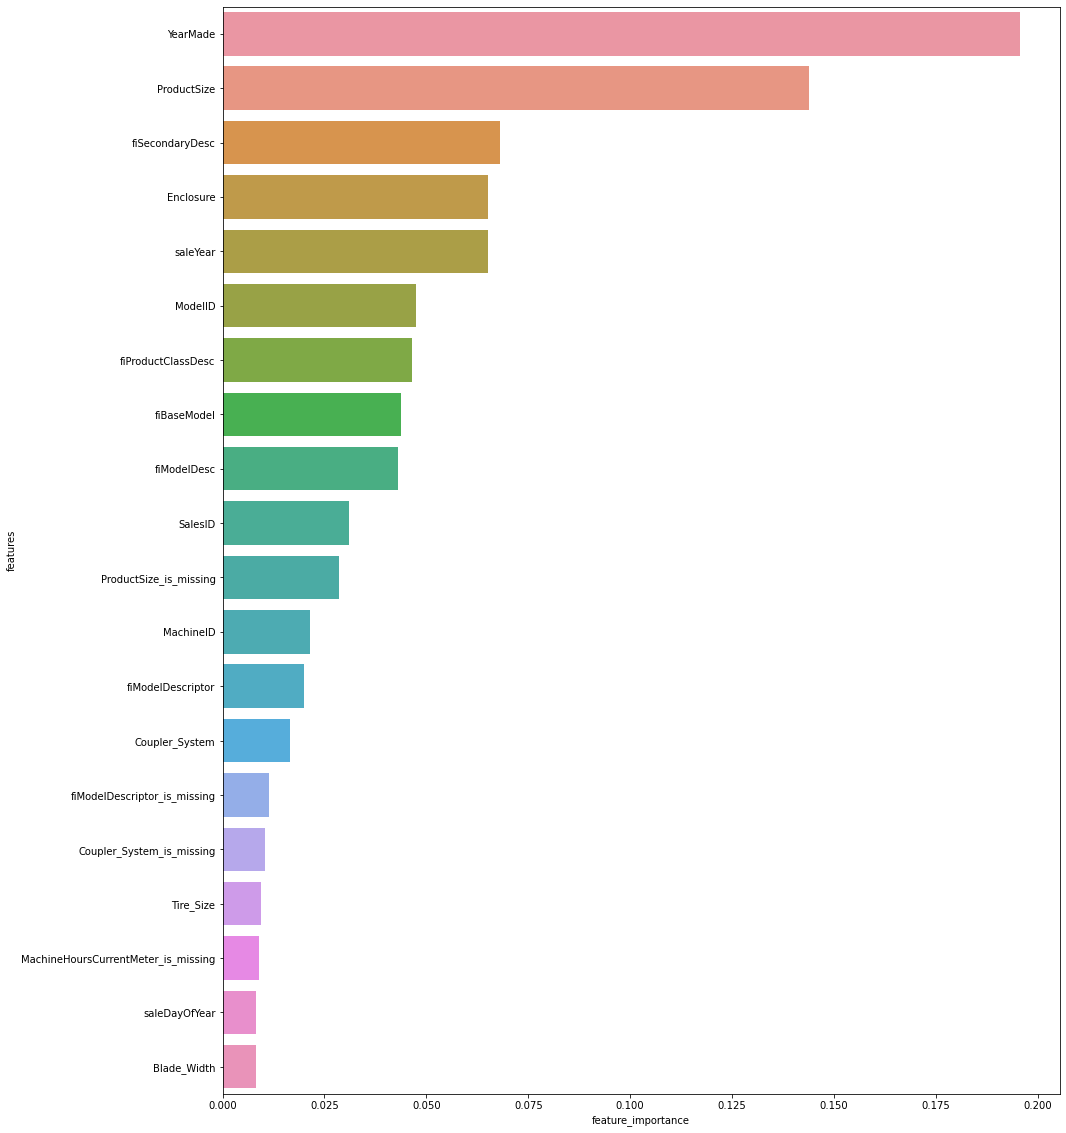

In [156]:
plot_features(X_train.columns, best_model.feature_importances_)

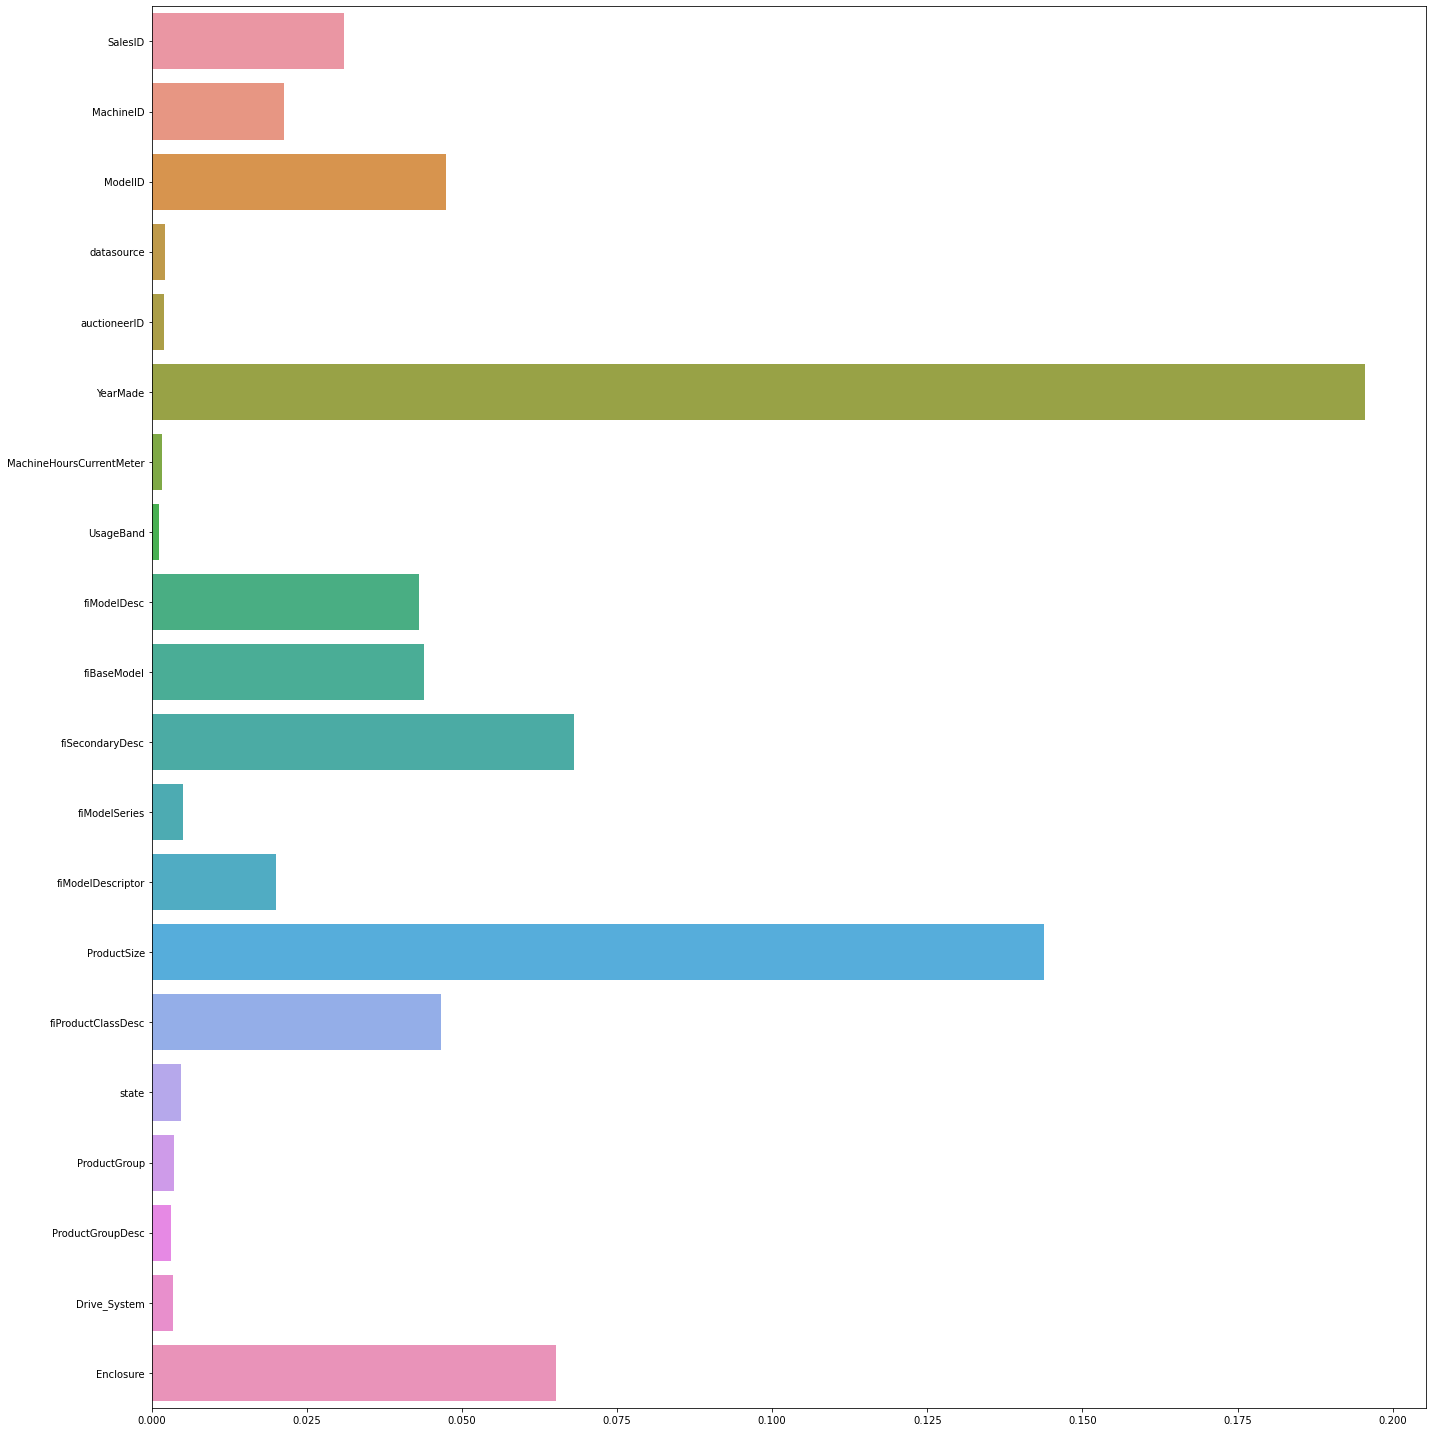

In [160]:
# sns.set_style('white')
plt.figure(figsize=(20,20))
sns.barplot(y= X_train.columns[:20],x = best_model.feature_importances_[:20],orient='h')
plt.tight_layout()


In [178]:
df_imp_20 = (pd.DataFrame({"features": X_train.columns, "feature_importance": best_model.feature_importances_})
.sort_values("feature_importance", ascending=False).reset_index(drop=True))

In [179]:
df_imp

,features,feature_importance
0,YearMade,0.195536
1,ProductSize,0.143814
2,fiSecondaryDesc,0.068099
3,Enclosure,0.065166
4,saleYear,0.065115
...,...,...
97,state_is_missing,0.000000
98,fiProductClassDesc_is_missing,0.000000
99,fiBaseModel_is_missing,0.000000
100,fiModelDesc_is_missing,0.000000


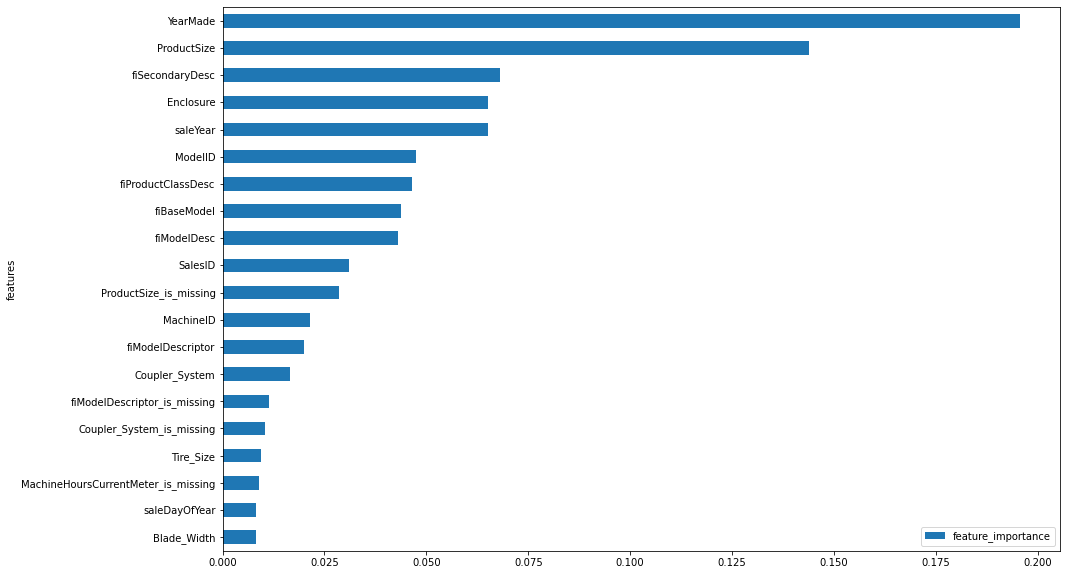

In [183]:
df_imp[:20].plot.barh(y="feature_importance", x='features', figsize=(15,10)).invert_yaxis()

<BarContainer object of 10 artists>

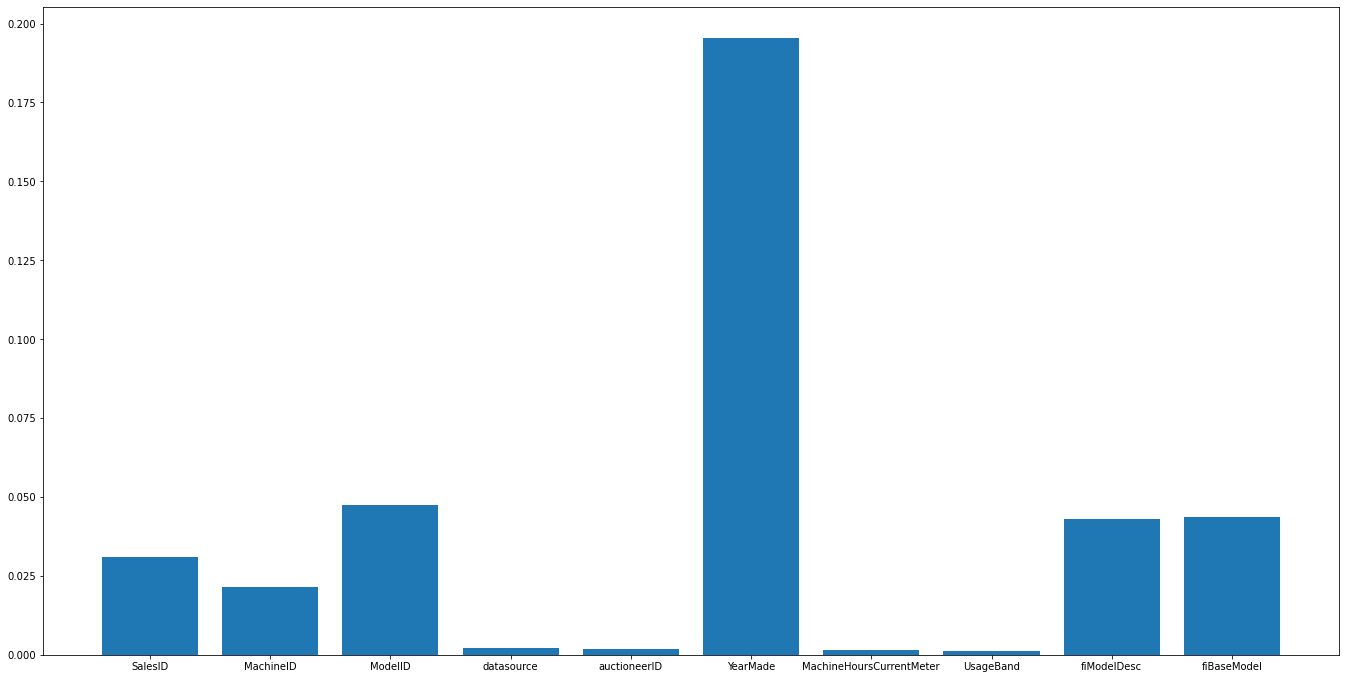

In [190]:
fig = plt.figure(figsize=(20,10))
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.bar(x= df_test.columns[:10], height=best_model.feature_importances_[:10])

In [191]:
sum(best_model.feature_importances_)

1.0000000000000002

In [195]:
df_tmp["ProductSize_is_missing"].sum()

216605

In [197]:
df_tmp['ProductSize'].value_counts()

0    216605
4     64342
3     51297
6     27057
5     25721
2     21396
1      6280
Name: ProductSize, dtype: int64

## Future Work:
1) Pocess train and valid data separately as train data should not have future information. (for eg. when taking meadian values of validation set are also considered). Hence, this might not give us an accurate measure of how our model will perform on a previously unseen data.  

2) This dataset has many columns that have a high number of missing values, we can deal with such columns differently. One option may be to drop the columns with more than 80%/90% of unknown values as filling these with dummy values adds a lot of misinformation.   

3) Unimportant features can be dropped.  

4) There might be features such as if bulldozers were not sold in 2008, this was due to economic depression. Features like these might misguide our model to identify/learn false funcetions.   

5) Other Regression models can be used.